# STARTastro coding demo

This notebook provides an example of a code that addressese the following task. Please see the associated workshops slides for a discussion on the development of the routines below: 
https://docs.google.com/presentation/d/1vLFpfUJSLKHW4SWfb207_GcQi-lNVZ7qdTwBBKXZY7o/edit?usp=sharing

**Goal**: You are inside a perfectly dark room that has one exit. You know there is a flashlight somewhere in the room, you just don't know where it is. Also, the walls are covered in poison ivy, so you don't want to touch them. Write an algorithm that will get you out of the room safely and quickly.

Basic steps:
* Find the flashlight
* Use it to find door and get out

In [14]:
# imports
import numpy
import matplotlib.pyplot as plt
import copy
%matplotlib inline


# Code development

Our actions and events can be broken down as follows:
* Find the flashlight
    * develop a routine that checks whether the flashlight is in reach (at our location)
    * if so, allow me to "get out"
* Move
    * include some specific move strategies
    * include an "ouch" action if we end up hitting the wall
* check for wall
    * use "echolocation" - yell out, then listen to response to see if we're near a wall
* touching poison ivy
    * should be triggered if we hit a wall
    * there should be a penalty - reduction in life force
    * if life force = 0 then we "die"
* visualizing
    * want to be able to see our path once we get out or if we die
* a test function

Some key variables we need to keep track of:
* where we are (including past trajectory) - randomly generate initial condition
* where the flashlight is - randomly generate
* if we have the flashlight
* where the exit is - randomly generate
* our life points
* size of our space


In [43]:
# Variables
# size of area (length of x and y sides)
GRIDSIZE = 10
# max number of lifepoints until you die
MAX_LIFEPOINTS = 20

# Functions
def restart():
    '''
    Function that restarts us from the beginning
     resets MY_LOCATION, LIFEPOINTS, HAS_FLASHLIGHT, and PATH 
    Input: none
    Output: none
    Modifies: LIFEPOINTS,HAS_FLASHLIGHT,MY_LOCATION,PATH
    Calls: nothing
    Usage: restart()
    '''
    global LIFEPOINTS,HAS_FLASHLIGHT,MY_LOCATION,FLASHLIGHT_LOCATION,DOOR_LOCATION,PATH
# starting values    
    LIFEPOINTS = MAX_LIFEPOINTS
    HAS_FLASHLIGHT = False
    MY_LOCATION = [numpy.random.randint(1,GRIDSIZE),numpy.random.randint(1,GRIDSIZE)]
    FLASHLIGHT_LOCATION = [numpy.random.randint(1,GRIDSIZE),numpy.random.randint(1,GRIDSIZE)]
    DOOR_LOCATION = [0,numpy.random.randint(0,GRIDSIZE)]
    PATH = [copy.deepcopy(MY_LOCATION)]
    return
# run at the start of code    
restart()

def cryForHelp():
    '''
    Function that cries for help, used in echoLocate()
    Input: none
    Output: none
    Modifies: nothing, purely informational
    Calls: nothing
    Usage: cryForHelp()
    '''
    print('HEEEELLLLLPPPP')
    return

def echoLocate():
    '''
    Function that check if the wall is near us
    Input: none
    Output: none
    Modifies: nothing, purely informational
    Calls: cryForHelp()
    Usage: echoLocate()
    '''
    global MY_LOCATION,GRIDSIZE
    cryForHelp()
    if MY_LOCATION[0]==1:
        print('The wall is just to my left')
    elif MY_LOCATION[0]==GRIDSIZE-1:
        print('The wall is just to my right')
    elif MY_LOCATION[1]==1:
        print('The wall is just in front of me')
    elif MY_LOCATION[1]==GRIDSIZE-1:
        print('The wall is just behind me')
    else: 
        print('Not close to a wall')
    return

def ouch():
    '''
    Function that is called if we touch the poison ivy wall
    Input: none
    Output: none
    Modifies: LIFEPOINTS,MY_LOCATION,PATH
    Calls: nothing
    Usage: ouch()
    '''
    global LIFEPOINTS,PATH,MY_LOCATION,GRIDSIZE
    print('OUUUCH POISON IVY!')
    LIFEPOINTS=LIFEPOINTS-1
    if LIFEPOINTS==0:
        die()
    if MY_LOCATION[0]==0: MY_LOCATION[0]=1
    if MY_LOCATION[1]==0: MY_LOCATION[1]=1
    if MY_LOCATION[0]==GRIDSIZE: MY_LOCATION[0]=GRIDSIZE-1
    if MY_LOCATION[1]==GRIDSIZE: MY_LOCATION[1]=GRIDSIZE-1
    PATH.append(copy.deepcopy(MY_LOCATION))
    return

def die():
    '''
    Function that is called if our LIFEPOINTS goes to 0
    Input: none
    Output: plots path then raises a ValueError to stop external loops
    Modifies: nothing, purely informational
    Calls: plotPath()
    Usage: die()
    '''
# make sure you're really dead    
    if LIFEPOINTS>0:
        print('Not dead yet!')
        return False
# yup, dead, so quit out    
    else:
        print('You touched too much poison ivy and DIED!')
        plotPath()
        raise ValueError('QUITTING')
    return
    
def move(how='random'):
    '''
    Function that moves us by various ways
    Input:
        how: str indicating how we move, can be 
        'left','right','forward','backward','random' (default), and 'magic'
    Output: none
    Usage: move(how='random')
    Modifies: MY_LOCATION,PATH
    Calls: ouch()
    '''
    global MY_LOCATION,GRIDSIZE,PATH
    if how=='random':
        MY_LOCATION[0] = MY_LOCATION[0]+numpy.random.choice([-1,0,1])
        MY_LOCATION[1] = MY_LOCATION[1]+numpy.random.choice([-1,0,1])
    elif how=='left':
        MY_LOCATION[0] = MY_LOCATION[0]-1
    elif how=='right':
        MY_LOCATION[0] = MY_LOCATION[0]+1
    elif how=='forward':
        MY_LOCATION[1] = MY_LOCATION[1]-1
    elif how=='backward':
        MY_LOCATION[1] = MY_LOCATION[1]+1
    elif how=='magic':
        MY_LOCATION = [numpy.random.randint(1,GRIDSIZE),numpy.random.randint(1,GRIDSIZE)]
    else: 
        print('Can only move left, right, forward, backward or random')
    PATH.append(copy.deepcopy(MY_LOCATION))
# if we run into wall
    if MY_LOCATION[0]==0 or MY_LOCATION[1]==0 or MY_LOCATION[0]==GRIDSIZE or MY_LOCATION[1]==GRIDSIZE:
        ouch()
    return

def grabFlashlight():
    '''
    Function that tests whether there is a flashlight under us
    Input: none
    Output: none
    Modifies: HAS_FLASHLIGHT
    Calls: nothing
    Usage: grabFlashlight()
    '''
    global MY_LOCATION,FLASHLIGHT_LOCATION,HAS_FLASHLIGHT
# if our location = flashlight location, success!
    if MY_LOCATION[0]==FLASHLIGHT_LOCATION[0] and MY_LOCATION[1]==FLASHLIGHT_LOCATION[1]:
        HAS_FLASHLIGHT=True
        print('Got the flashlight!')
# otherwise no change
    else:
        print('Nope, nothing there')
    return

def getOut():
    '''
    Function that gets us out of the room if we have the flashlight
    Input: none
    Output: none
    Usage: getOut()
    Modifies: MY_LOCATION,PATH
    Calls: plotPath()
    '''
    global MY_LOCATION,DOOR_LOCATION,HAS_FLASHLIGHT
    if HAS_FLASHLIGHT==True:
        print('Ah! I see the door at {:.0f},{:.0f}; heading there'.format(DOOR_LOCATION[0],DOOR_LOCATION[1]))
        MY_LOCATION = DOOR_LOCATION
        PATH.append(copy.deepcopy(MY_LOCATION))
    if MY_LOCATION[0]==DOOR_LOCATION[0] and MY_LOCATION[1]==DOOR_LOCATION[1]:
        print('I am out, hooray!')
        plotPath()
        return True
    else:
        print('Not until you find the flashlight!')
        return False

def plotPath():
    '''
    Function that plots our path of motion
    Input: none
    Output: generates a line plot showing path relative to start point, flashlight, and exit
    Modifies: nothing
    Calls: matplotlib.pyplot
    Usage: plotPath()
    '''    
    global PATH,HAS_FLASHLIGHT,GRIDSIZE,FLASHLIGHT_LOCATION,DOOR_LOCATION,LIFEPOINTS
    xval = [p[0] for p in PATH]
    yval = [p[1] for p in PATH]
    plt.plot(xval,yval,'k-')
    plt.plot(xval[0],yval[0],'ko',ms=20)
    plt.plot(FLASHLIGHT_LOCATION[0],FLASHLIGHT_LOCATION[1],'bo',ms=20)
    plt.plot(DOOR_LOCATION[0],DOOR_LOCATION[1],'go',ms=20)
    if LIFEPOINTS==0: 
        plt.plot(xval[-1],yval[-1],'ro',ms=20)
    plt.xlim([0,GRIDSIZE])
    plt.ylim([0,GRIDSIZE])

def test():
    '''
    Function that tests our code
    Input: none
    Output: outcomes of various assert statements
    Modifies: nothing
    Calls: reset()
    Usage: restart()
    '''
    global MY_LOCATION,FLASHLIGHT_LOCATION,DOOR_LOCATION,LIFEPOINTS,PATH,HAS_FLASHLIGHT,GRIDSIZE
# test restart()
    restart()
    assert LIFEPOINTS==MAX_LIFEPOINTS, 'reset() did not set LIFEPOINTS to maximum'
# test cryForHelp()
    cryForHelp()
# test echoLocate()
    MY_LOCATION[0]=1 # this should inform us we're near a wall
    echoLocate()
# test ouch()
    LIFEPOINTS=MAX_LIFEPOINTS
    MY_LOCATION[0]=0 # this should put us in contact with wall
    ouch()
    assert LIFEPOINTS==MAX_LIFEPOINTS-1, 'ouch() did not reduce LIFEPOINTS by 1'
# test die()
    LIFEPOINTS=MAX_LIFEPOINTS
    assert die()==False # should not die since LIFEPOINTS >0
# test move()
    MY_LOCATION = [2,2]
    move(how='left')
    assert MY_LOCATION[0]==1, "move(how='left') did not work correctly"
    move(how='right')
    assert MY_LOCATION[0]==2, "move(how='right') did not work correctly"
    move(how='forward')
    assert MY_LOCATION[1]==1, "move(how='forward') did not work correctly"
    move(how='backward')
    assert MY_LOCATION[1]==2, "move(how='backward') did not work correctly"
# test grabFlashlight()
    HAS_FLASHLIGHT = False
    MY_LOCATION = [2,2]
    FLASHLIGHT_LOCATION = [2,3]
    grabFlashlight() # should stay false
    assert HAS_FLASHLIGHT==False
    FLASHLIGHT_LOCATION = [2,2]
    grabFlashlight() # should change to true
    assert HAS_FLASHLIGHT==True
# test getOut()
    MY_LOCATION = [2,2]
    DOOR_LOCATION = [0,0]
    HAS_FLASHLIGHT=False
    assert getOut()==False
    MY_LOCATION = [0,0]
    DOOR_LOCATION = [0,0]
    HAS_FLASHLIGHT=True
    assert getOut()==True
    MY_LOCATION = [0,0]
    DOOR_LOCATION = [0,0]
    HAS_FLASHLIGHT=False
    assert getOut()==True
# success!
    print('\nALL TESTS PASS!!')
    return

HEEEELLLLLPPPP
HEEEELLLLLPPPP
The wall is just to my left
OUUUCH POISON IVY!
Not dead yet!
Nope, nothing there
Got the flashlight!
Not until you find the flashlight!
Ah! I see the door at 0,0; heading there
I am out, hooray!
I am out, hooray!

ALL TESTS PASS!!


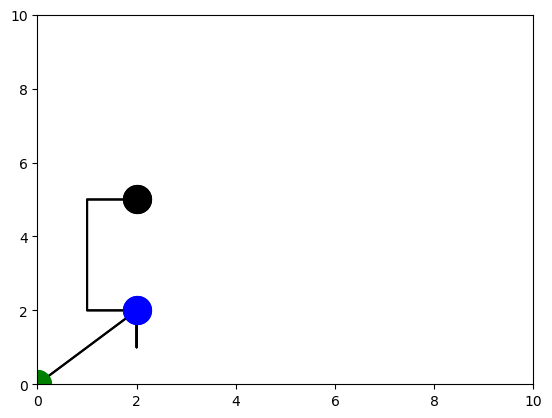

In [44]:
test()

Nope, nothing there
HEEEELLLLLPPPP
The wall is just behind me
OUUUCH POISON IVY!
Nope, nothing there
HEEEELLLLLPPPP
The wall is just behind me
OUUUCH POISON IVY!
Nope, nothing there
HEEEELLLLLPPPP
The wall is just behind me
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
The wall is just behind me
Nope, nothing there
HEEEELLLLLPPPP
The wall is just behind me
Nope, nothing there
HEEEELLLLLPPPP
The wall is just behind me
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
The wall is just to my left
Nope, nothing there
HEEEELLLLLPPPP
The wall is just behind me
Nope, nothing there
HEEEELLLLLPPPP
The wall is just to my left
Nope, nothing there
HEEEELLLLLPPPP
The wall is just to my left
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, not

ValueError: QUITTING

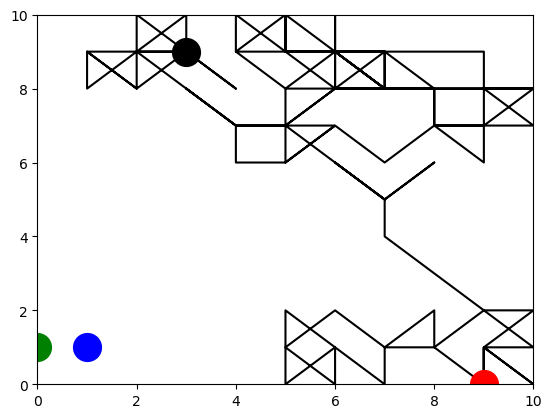

In [23]:
# loop to get around
restart()
grabFlashlight()
while HAS_FLASHLIGHT==False:
    echoLocate()
    move()
    grabFlashlight()
getOut()

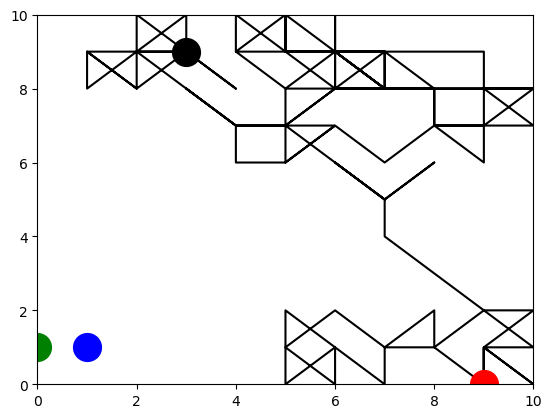

In [24]:
plotPath()

# Importing our code

I've placed this code in the file "escape.py", from which you can import the same functions

In [45]:
import escape

Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
The wall is just behind me
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nope, nothing there
HEEEELLLLLPPPP
Not close to a wall
Nop

ValueError: QUITTING

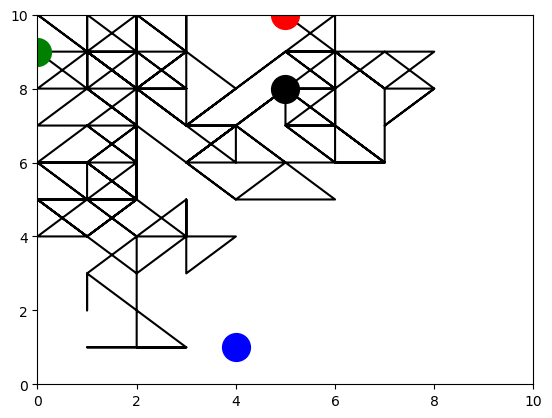

In [32]:
# loop to get around
escape.restart()
escape.grabFlashlight()
while escape.HAS_FLASHLIGHT==False:
    escape.echoLocate()
    escape.move()
    escape.grabFlashlight()
escape.getOut()

In [42]:
def func(var):
    print('this is a great number')
    if var>4:
        raise ValueError('this number is way too big')
    print('you are a wonderful instructor')
    return

func(5)
        

this is a great number


ValueError: this number is way too big